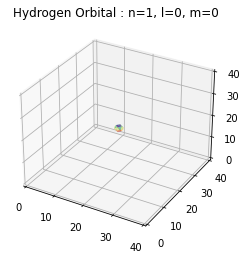

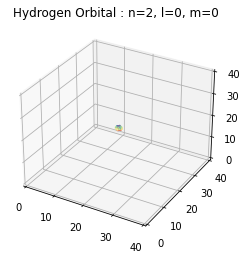

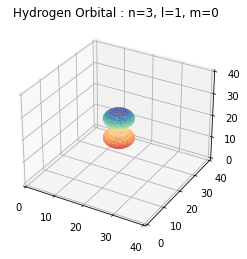

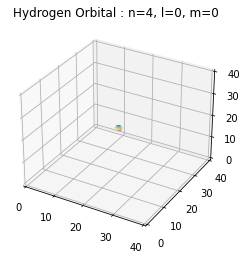

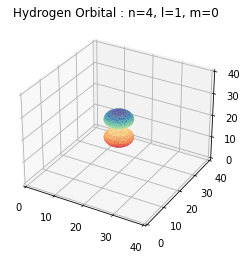

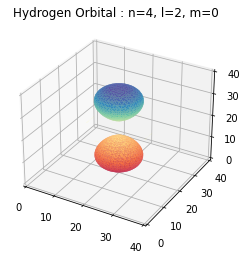

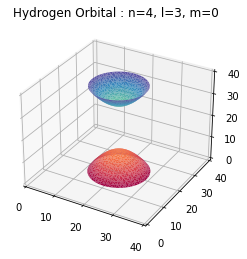

In [52]:
import warnings
warnings.filterwarnings('ignore')
import numpy
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.special
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap
import skimage
from skimage import measure
from matplotlib.pyplot import figure

def hydrogen_wf(n,l,m,X,Y,Z):
 R = numpy.sqrt(X**2+Y**2+Z**2)
 Theta = numpy.arccos(Z/R)
 Phi = numpy.arctan2(Y,X)
 rho = 2.*R/n
 s_harm=sph_harm(m, l, Phi, Theta)
 l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
 prefactor = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
 wf = prefactor*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
 wf = numpy.nan_to_num(wf)
 return wf
dz=0.5
zmin=-10
zmax=10
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz) 
z = numpy.arange(zmin,zmax,dz) 

X,Y,Z = numpy.meshgrid(x,y,z)
orbitals = [[1,0,0], [2,0,0], [3,1,0], [4,0,0], [4,1,0], [4,2,0], [4,3,0]]

for i in orbitals:
 n=i[0]
 l=i[1]
 m=i[2]
 data = hydrogen_wf(n,l,m,X,Y,Z)
 data = abs(data)**2
 R = numpy.sqrt(X**2+Y**2+Z**2)
 fig = plt.figure()

 plt.xlim(0,40)
 plt.ylim(0,40)
 
 ax = fig.add_subplot(111, projection='3d')
 ax.set_xlim([0,len(x)])
 ax.set_ylim([0,len(y)])
 ax.set_zlim([0,len(z)])

 max_val = numpy.max(data)
 verts, faces, _, _ = measure.marching_cubes(data, max_val/4, spacing = (1,1,1))
 result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)
 ax.set_title("Hydrogen Orbital : n="+str(n)+", l="+str(l)+", m="+str(m))
 plt.show()

